In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification




In [4]:
fraud = pd.read_csv("C:/Users/rayya/OneDrive/Documents/creditcard.csv")

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

In [9]:
X = fraud[fraud.columns[:-1]].values
y = fraud['Class'].values

In [10]:
def classify(model, x, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=35)
    model.fit(X_train, y_train)
    print('accuracy', model.score(X_test, y_test))

In [11]:
model = LogisticRegression( max_iter = 1000)
scores = cross_val_score(model, X, y, cv=10)
print('CV accuracy:', (np.mean(scores)))

CV accuracy: 0.9975808321504696


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)


In [13]:
pipe = make_pipeline(StandardScaler(),PCA(n_components = 4), Perceptron(eta0 = 0.001))
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))

0.9967442305850809


In [21]:
from sklearn.preprocessing import LabelEncoder
cols = ['Class']
le= LabelEncoder()
for col in cols:
    fraud[col] = le.fit_transform(fraud[col])

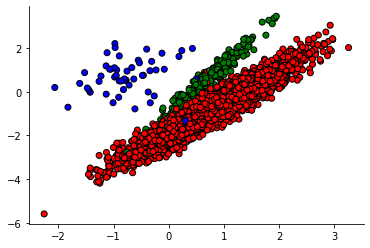

In [5]:
import seaborn as sns
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)

import matplotlib.pyplot as plt
colors = ['blue' if v == 0 else 'green' if v == 1 else 'red' for v in y]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig = plt.Figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1], c=colors, **kwarg_params)
sns.despine()

In [25]:
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [28]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

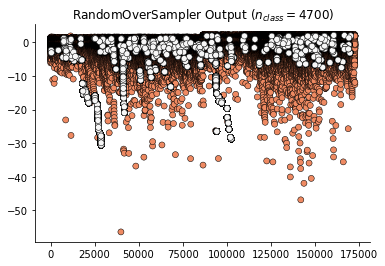

In [31]:


ros = RandomOverSampler(random_state=0)
ros.fit(X, y)
X_resampled, y_resampled = ros.fit_resample(X, y)
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomOverSampler Output ($n_{class}=4700)$")
pass

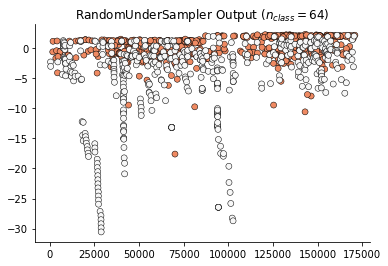

In [33]:
rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)
X_resampled, y_resampled = rus.fit_resample(X, y)
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomUnderSampler Output ($n_{class}=64)$")
pass

In [43]:
fraud['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

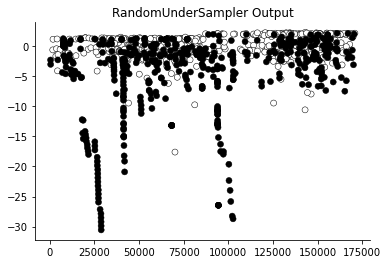

In [45]:
rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)
X_resampled, y_resampled = rus.fit_resample(X, y)
colors = ['white' if v == 0 else 'black' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomUnderSampler Output")
pass